In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales-prediction/sample_submission_V9Inaty.csv
/kaggle/input/black-friday-sales-prediction/train_oSwQCTC (1)/train.csv
/kaggle/input/black-friday-sales-prediction/test_HujdGe7 (1)/test.csv


https://www.youtube.com/watch?v=4DnWYK88-E4

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error


1) Exploring the data and Data Preprocessing:

In [54]:
test = pd.read_csv('../input/black-friday-sales-prediction/test_HujdGe7 (1)/test.csv')
train = pd.read_csv('../input/black-friday-sales-prediction/train_oSwQCTC (1)/train.csv')

In [55]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [56]:
train.shape

(550068, 12)

Statistique description

In [57]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


Le résumé de l'ensemble de données

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Recherche de valeurs manquantes dans l'ensemble de données

In [59]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

l'importance des valeurs manquantes dans Product_cat 2 et 3.
On va les traiter dans la prochaine étape

1.1)Univariate Analysis:
* la variable cible et son graphique asymétrique

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of sales')

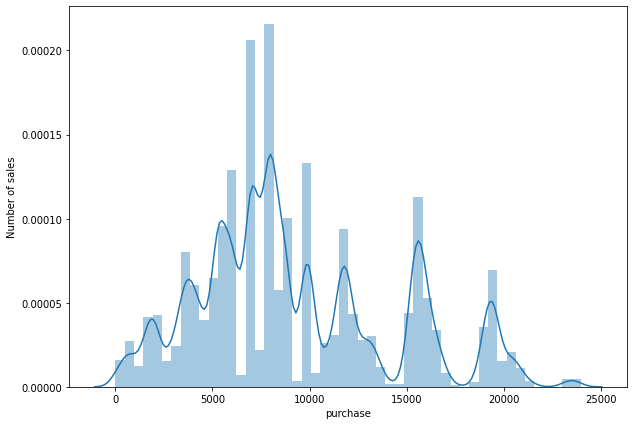

In [60]:
plt.figure(figsize=(10,7))
sns.distplot(train.Purchase)
plt.xlabel("purchase")
plt.ylabel("Number of sales")



In [61]:
train.Purchase.skew()

0.6001400037087128

Le graphique montre qu'il est orienté à droite vers les ventes les plus élevées, avec une concentration plus élevée sur les ventes de 5000-10000.

* Analyse des valeurs numérique

In [62]:
number_variable= train.select_dtypes(include=np.number)
number_variable.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

Corrélation entre les valeurs numériques et la variable cible

In [63]:
corr=number_variable.corr()
corr

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [64]:
corr.Purchase.sort_values(ascending=True)

Product_Category_1   -0.343703
Product_Category_2   -0.209918
Product_Category_3   -0.022006
Marital_Status       -0.000463
User_ID               0.004716
Occupation            0.020833
Purchase              1.000000
Name: Purchase, dtype: float64

<AxesSubplot:>

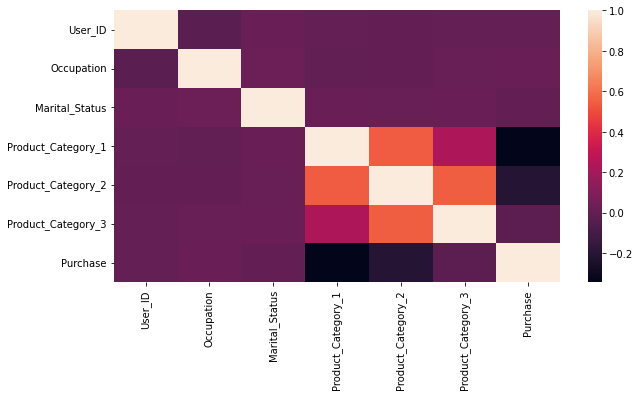

In [65]:
plt.figure(figsize=(10,5))
sns.heatmap(corr)

grace à ce graphique on peut constaster que la variable " product cat 1" a une faible relation avec purchase
à l'envers la variable "product cat 3" a une forte relation avec purchase

Analyse des categoricals variables

In [66]:
Categorical_variable =train.select_dtypes('object')
Categorical_variable=Categorical_variable.drop(['Product_ID'],axis=1)
Categorical_variable.dtypes

Gender                        object
Age                           object
City_Category                 object
Stay_In_Current_City_Years    object
dtype: object

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

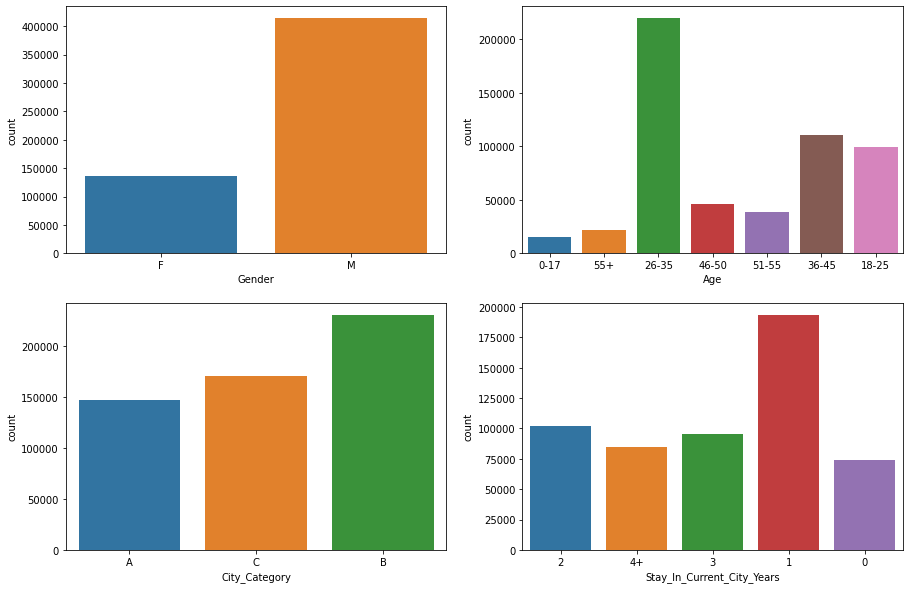

In [67]:
plt.figure(figsize=(15,10))
for i in enumerate(Categorical_variable.columns):
    plt.subplot(2,2,i[0]+1) #plt.subplot(totalrows, total columns, plot)
    sns.countplot(i[1],data=train)



on peut visualiser le comportement du client: les homme achetent plus que les femme, tranche d'age de 26-35, city cat en B et s'installer depuis 1 an

1.2)Bivariate Analysis:

On va analyser des variables qu'il a plus ou moins relation avec le target

Text(0.5, 1.0, ' Product cat 1 vs Purchase')

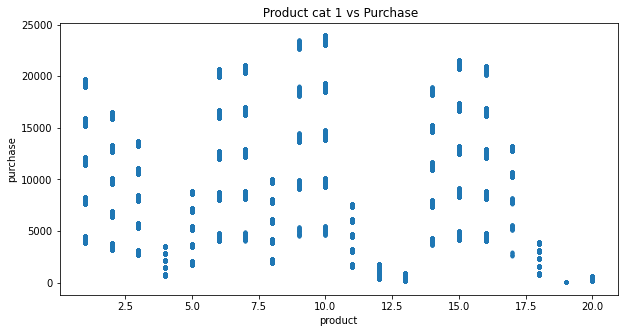

In [68]:
plt.figure(figsize=(10,5))
plt.plot(train.Product_Category_1, train.Purchase,'.')
plt.xlabel("product")
plt.ylabel("purchase")
plt.title(" Product cat 1 vs Purchase")

Text(0.5, 1.0, ' Product cat 3 vs Purchase')

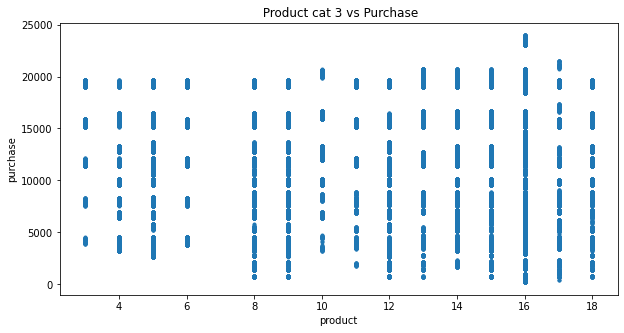

In [69]:
plt.figure(figsize=(10,5))
plt.plot(train.Product_Category_3, train.Purchase,'.')
plt.xlabel("product")
plt.ylabel("purchase")
plt.title(" Product cat 3 vs Purchase")

Text(0.5, 1.0, ' Occupation vs Purchase')

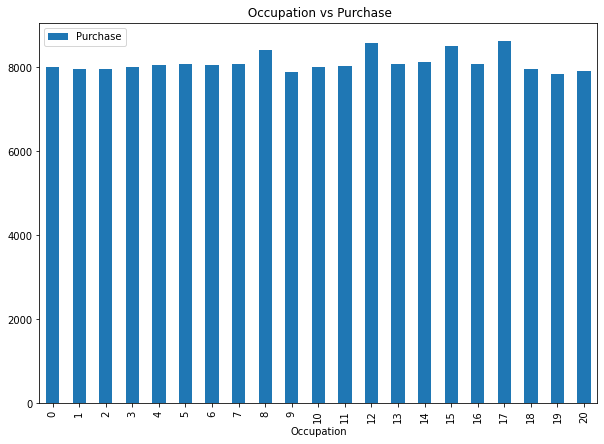

In [70]:
occupation_purchase_pivot= train.pivot_table(index="Occupation", values="Purchase", aggfunc=np.median)
occupation_purchase_pivot.plot(kind='bar',figsize=(10,7))
plt.title(" Occupation vs Purchase")

Text(0.5, 1.0, 'City categorie vs Purchase')

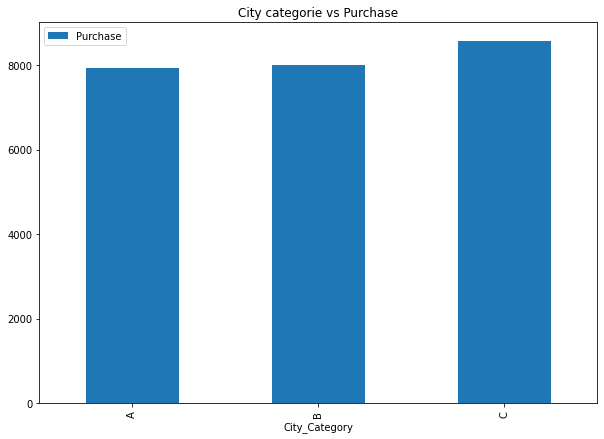

In [71]:
City_cat_purchase_pivot= train.pivot_table(index="City_Category", values="Purchase", aggfunc=np.median)
City_cat_purchase_pivot.plot(kind='bar',figsize=(10,7))
plt.title("City categorie vs Purchase")

2. Data processing

#Fill NA

In [72]:
train.isnull().sum()
train['Product_Category_2']=train['Product_Category_2'].fillna(train['Product_Category_2'].mean())
train['Product_Category_3']=train['Product_Category_3'].fillna(train['Product_Category_3'].mean())

# Encoding 

In [73]:
label_encoder = LabelEncoder()
cols =['Gender','Age','City_Category','Stay_In_Current_City_Years']
for col in cols:
    train[col]=label_encoder.fit_transform(train[col])
train.head()



,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9.842329,12.668243,7969


**Input split**

In [74]:
X=train.drop(columns=['User_ID','Product_ID','Purchase'])
y=train['Purchase']

3.Creating Model

In [75]:
x_train,x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=3)

In [76]:
#LinearRegression
model=LinearRegression()
LR_model=model.fit(x_train,y_train)
pred=LR_model.predict(x_test)
MSE_LR=np.sqrt(mean_squared_error(y_test,pred))


In [77]:
#RandomForest
model=RandomForestRegressor()
RFR_model=model.fit(x_train,y_train)
pred=RFR_model.predict(x_test)
MSE_RFR=np.sqrt(mean_squared_error(y_test,pred))



In [78]:
#DecisionTreeRegressor
model=DecisionTreeRegressor()
DTR_model=model.fit(x_train,y_train)
pred=DTR_model.predict(x_test)
MSE_DTR=np.sqrt(mean_squared_error(y_test,pred))

In [79]:
#SGDRegressor
from sklearn.linear_model import SGDRegressor
model=SGDRegressor()
SGD_model=model.fit(x_train,y_train)
pred=SGD_model.predict(x_test)
MSE_SGD=np.sqrt(mean_squared_error(y_test,pred))

In [91]:
#XGB
import xgboost as xgb
model = xgb.XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_model=model.fit(x_train, y_train)
pred = xgb_model.predict(x_test)
MSE_xgb= np.sqrt(mean_squared_error(y_test, pred))
MSE_xgb


2879.0929207506424

In [90]:
compa=pd.DataFrame({"MSE_LinearRegression":MSE_LR,
                   "MSE_Random Forest Regression":MSE_RFR,
                   "MSE_Decision Tree Regression":MSE_DTR,
                   "MSE_GDRegressor":MSE_SGD,
                   "MSE_XGB":MSE_xgb},index=[0])
compa

,MSE_LinearRegression,MSE_Random Forest Regression,MSE_Decision Tree Regression,MSE_GDRegressor,MSE_XGB
0,4703.964014,3055.646946,3360.883251,4910.144628,2879.092921
